<a href="https://colab.research.google.com/github/Cristobalm26/Actividades_EIE401/blob/main/Actividades/Actividad_4/Actividad_4_Cristobal_Moraga_19841682_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Cristóbal Antonio Moraga Acosta</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA/blob/main/assets/scipy-signal-convolution.png?raw=1"/></center>


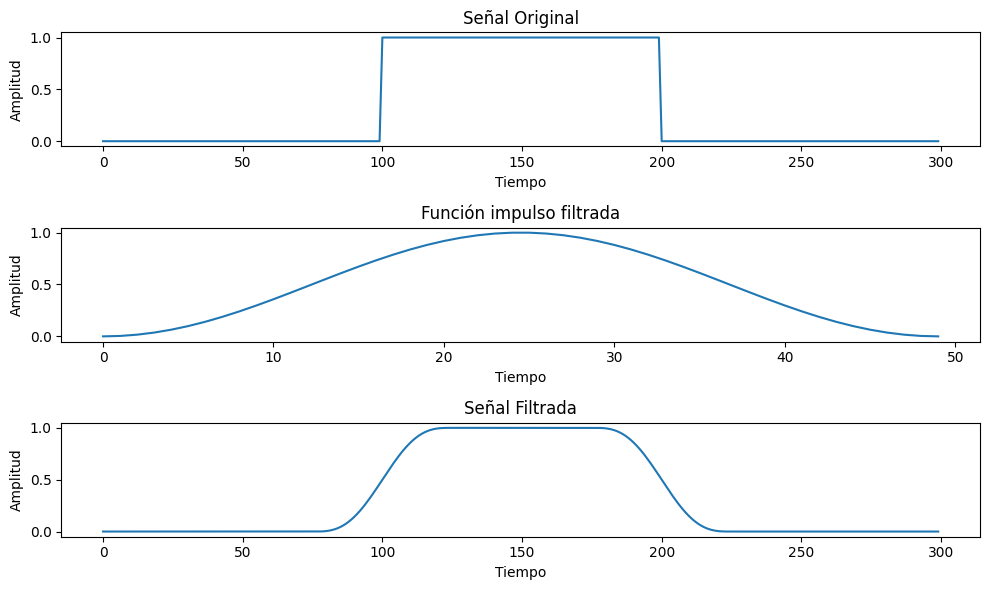

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

sig = np.repeat([0., 1., 0.], 100)

win = signal.windows.hann(50)

filtered = signal.convolve(sig, win, mode='same') / sum(win)

# Vector de tiempo a graficar
t_sig = np.arange(0, len(sig))
t_filtered = np.arange(0, len(filtered))

# Grafica de la señal original y señal filtrada
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t_sig, sig)
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(win)
plt.title('Función impulso filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 3)
plt.plot(t_filtered, filtered)
plt.title('Señal Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


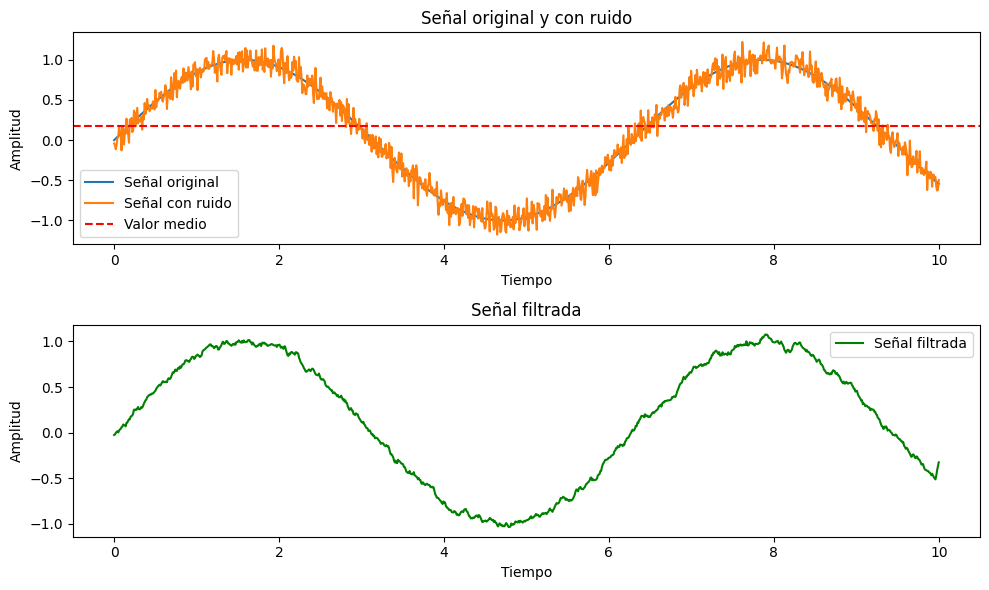

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Señal original
t = np.linspace(0, 10, 1000)  # Tiempo
original_signal = np.sin(t)    # Señal original

# Se agregar ruido a la señal
noise = np.random.normal(0, 0.1, original_signal.shape)  # Ruido gaussiano
noisy_signal = original_signal + noise

# Valor medio de la señal con ruido
mean_value = np.mean(noisy_signal)

# Se filtrar la señal utilizando el promedio
window_size = 10  # Tamaño de la ventana del promedio
filtered_signal = np.convolve(noisy_signal, np.ones(window_size)/window_size, mode='same')

# Visualización de las señales
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, original_signal, label='Señal original')
plt.plot(t, noisy_signal, label='Señal con ruido')
plt.axhline(mean_value, color='r', linestyle='--', label='Valor medio')
plt.title('Señal original y con ruido')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, 'g', label='Señal filtrada')
plt.title('Señal filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


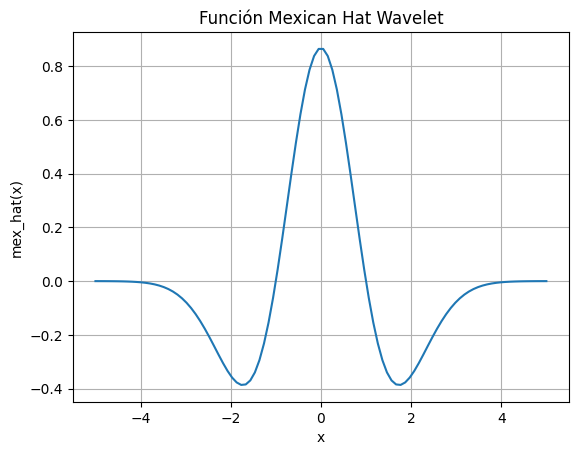

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    return (2 / (np.sqrt(3 * sigma) * np.pi ** 0.25)) * \
           (1 - (x ** 2 / sigma ** 2)) * \
           np.exp(-x ** 2 / (2 * sigma ** 2))

# Datos para probar la función
x = np.linspace(-5, 5, 100)
mu = 0
sigma = 1

# Calculo de la función Mexican Hat Wavelet
mex_hat = mexican_hat(x, mu, sigma)

# Visualizar la función Mexican Hat Wavelet
plt.plot(x, mex_hat)
plt.title('Función Mexican Hat Wavelet')
plt.xlabel('x')
plt.ylabel('mex_hat(x)')
plt.grid(True)
plt.show()


### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

Este código implementa una función para generar versiones escaladas y trasladadas de una función de wavelet específica (en este caso, la función Mexican Hat Wavelet) en función de los parámetros de escala y traslación. Luego, se visualizan estas versiones escaladas y trasladadas de la wavelet en un gráfico.

Aquí está la explicación detallada del código:

1. Se define una función psi_mn(psi, m, n) que toma tres argumentos:
   - psi: la wavelet original (en este caso, la función Mexican Hat Wavelet)
   - m: el parámetro de escala, que determina cuánto se estira o comprime la wavelet en la dirección del eje x.
   - n: el parámetro de traslación, que determina cuánto se mueve la wavelet a lo largo del eje x.

2. Dentro de la función psi_mn, se calculan los valores de escala a y traslación b según la fórmula:
   - a = 2^m: factor de escala
   - b = n * 2^m: factor de traslación

3. Se crea un array wav de longitud adecuada para contener la versión escalada y trasladada de la wavelet.

4. Se interpolan los valores de la wavelet original psi para ajustarse a la escala y traslación adecuadas, y se almacenan en wav.

5. Se devuelve el array wav que contiene la versión escalada y trasladada de la wavelet.

6. Se define la wavelet original psi utilizando la función Mexican Hat Wavelet mexican_hat con un rango de valores de x de -5 a 5 con incrementos de 0.1.

7. Se definen los límites del eje x xlim para la visualización.

8. Se definen dos listas de valores de escala ms y de traslación ns para generar múltiples versiones de la wavelet escalada y trasladada.

9. Se crea una figura con dos subtramas utilizando plt.subplot(121) para visualizar las wavelets generadas.

10. Para cada valor de m en la lista ms, se crea una subtrama y se generan y grafican las versiones escaladas y trasladadas de la wavelet para cada valor de n en la lista ns utilizando la función psi_mn. Cada versión se grafica con una etiqueta que muestra el valor de n.

11. Se establece el título de la subtrama con el valor de m y se añade una leyenda.

12. Se ajustan los límites del eje x de las subtramas según los valores definidos en xlim.

13. Finalmente, se muestra el gráfico con todas las versiones escaladas y trasladadas de la wavelet.

### 3.2.2 completa el siguiente código para realizar la transformada


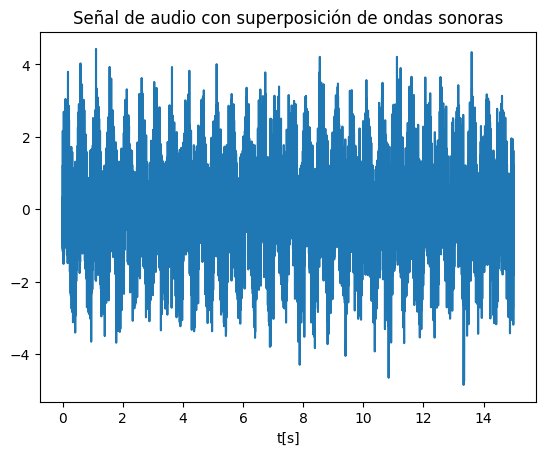

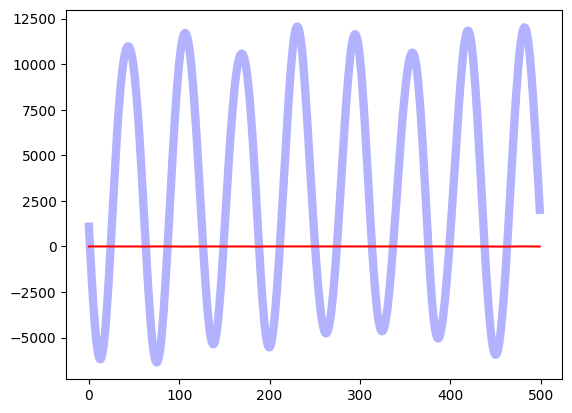

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    return (2 / (np.sqrt(3 * sigma) * np.pi ** 0.25)) * \
           (1 - (x ** 2 / sigma ** 2)) * \
           np.exp(-x ** 2 / (2 * sigma ** 2))

def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a, np.arange(len(psi)), psi)
    return wav

def twav_mn(f, psi, m, n):
    f_scaled = np.convolve(f, psi_mn(psi, m, n), mode='valid')
    transform_scaled = np.sum(f_scaled)
    return transform_scaled

def twav_mn_naive(f, psi, m, n):
    pmn = np.convolve(f, psi, mode='same')
    transform = pmn[n]  # Se asume que n esta en el range de pmn
    return transform

# Definición de parámetros y generación de la señal de audio
m = 3
ns = np.arange(1000, 1500)
res = 1000
freq = 2
x = np.arange(0, 15000, 1)  # Rango de valores de x
noise = np.random.normal(0, 1, len(x))  # Ruido
audio = np.sin(np.arange(15000) * 2 * np.pi * freq / res) + noise  # Señal de audio

# Transformada considerando la suma sobre la sección bajo estudio
transformed_sweept = [twav_mn(audio, mexican_hat(np.arange(-5, 5, 0.1), 0, 1), m, n) for n in ns]

# Transformada ingenua agregando sobre toda la longitud
naive_transformed_sweept = [twav_mn_naive(audio, mexican_hat(np.arange(-5, 5, 0.1), 0, 1), m, n) for n in ns]

# Visualización de la señal de audio
plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t[s]")
plt.title("Señal de audio con superposición de ondas sonoras")
plt.show()

# Visualización de las transformadas
plt.plot(transformed_sweept, color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()


### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

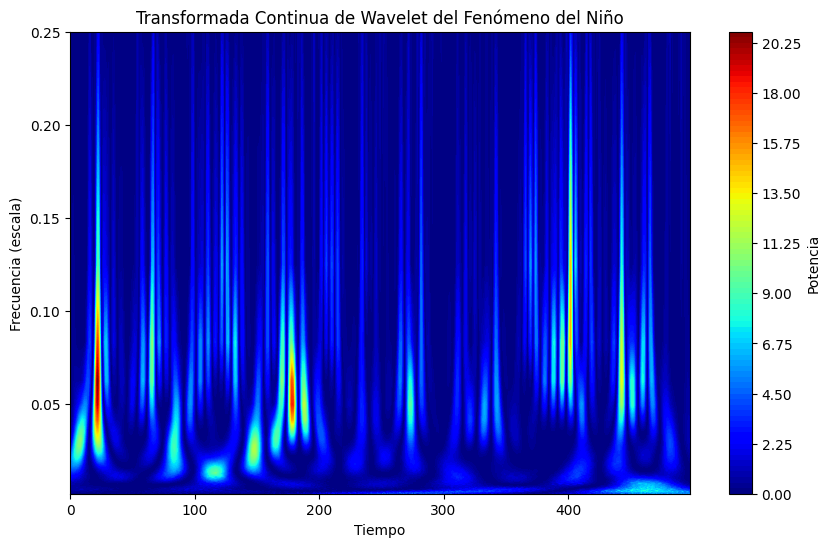

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import requests

# Descargar de datos
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
response = requests.get(url)
data = response.content.decode('utf-8').split('\n')[5:-1]
data = np.array([float(d) for d in data])

# Se aplica la transformada continua utilizando pywt.cwt
scales = np.arange(1, 128)
coef, freqs = pywt.cwt(data, scales, 'mexh')  # 'mexh' es la wavelet Mexican Hat

# Calculo de la potencia de los coeficientes
power = (np.abs(coef)) ** 2

# Graficar el resultado en un plot tipo contour
plt.figure(figsize=(10, 6))
plt.contourf(np.arange(len(data)), freqs, power, levels=100, cmap='jet')
plt.colorbar(label='Potencia')
plt.title('Transformada Continua de Wavelet del Fenómeno del Niño')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia (escala)')
plt.show()


### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El gráfico resultante muestra la transformada continua de wavelet aplicada a los datos históricos del fenómeno del Niño en términos de potencia. Aquí hay algunas interpretaciones de los resultados:

1. **Eje x (Tiempo)**: Este eje representa el tiempo, es decir, el período de tiempo cubierto por los datos históricos del fenómeno del Niño. Cada punto en el eje x corresponde a un punto en el tiempo.

2. **Eje y (Frecuencia)**: Este eje representa la frecuencia en términos de escala de la wavelet utilizada en la transformada continua. Las escalas más bajas representan frecuencias más altas y viceversa. Por lo tanto, las características de alta frecuencia están representadas en la parte inferior del gráfico, mientras que las características de baja frecuencia están representadas en la parte superior.

3. **Color (Potencia)**: El color en el gráfico representa la potencia de la transformada continua en cada punto. Cuanto más intenso es el color, mayor es la potencia de la señal en esa ubicación. Esto indica la importancia relativa de las diferentes frecuencias en diferentes momentos en los datos del fenómeno del Niño.

Al interpretar el gráfico, podemos buscar patrones y estructuras significativas en la distribución de potencia a lo largo del tiempo y la frecuencia.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/